In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras import optimizers, Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import warnings
warnings.filterwarnings('ignore')
import torch

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Nidakhairunnisa/Retail_6/main/Sample%20-%20Superstore.csv', parse_dates=True, encoding='windows-1254')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.shape

(9994, 21)

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
sales_data = df[['Order Date','Sales']]
sales_data.sort_values(['Order Date'],inplace=True)
sales_data

,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
908,2017-12-30,52.776
907,2017-12-30,90.930
1296,2017-12-30,13.904


In [8]:
# grouping sales by day
sales_data = sales_data.groupby(['Order Date'])[['Sales']].sum().reset_index()
sales_data['Order Year'] = sales_data['Order Date'].apply(lambda x:x.year)
sales_data

,Order Date,Sales,Order Year
0,2014-01-03,16.4480,2014
1,2014-01-04,288.0600,2014
2,2014-01-05,19.5360,2014
3,2014-01-06,4407.1000,2014
4,2014-01-07,87.1580,2014
...,...,...,...
1232,2017-12-26,814.5940,2017
1233,2017-12-27,177.6360,2017
1234,2017-12-28,1657.3508,2017
1235,2017-12-29,2915.5340,2017


In [9]:
import statsmodels
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose



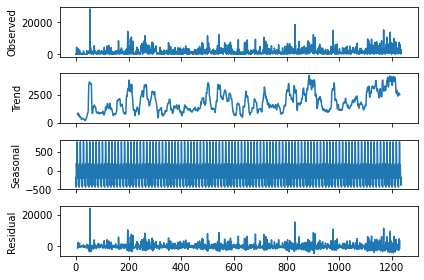

In [10]:
decomposition = seasonal_decompose(sales_data['Sales'], freq=12) 
decomposition.plot()
plt.show()

In [11]:
all_data = sales_data['Sales'].values.astype(float)
print(all_data)

[  16.448   288.06     19.536  ... 1657.3508 2915.534   713.79  ]


In [12]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [13]:
print(len(train_data))
print(len(test_data))

1225
12


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [15]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [16]:
train_window = 12

In [17]:
def create_inout_sequences(input_data, window):
    inout_seq = []
    L = len(input_data)
    for i in range(L-window):
        train_seq = input_data[i:i+window]
        train_label = input_data[i+window:i+window+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [18]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [19]:
train_inout_seq[:5]

[(tensor([-0.9990, -0.9796, -0.9988, -0.6865, -0.9939, -0.9973, -0.9962, -0.9994,
          -0.7472, -0.9957, -0.9895, -0.9788]), tensor([-0.9955])),
 (tensor([-0.9796, -0.9988, -0.6865, -0.9939, -0.9973, -0.9962, -0.9994, -0.7472,
          -0.9957, -0.9895, -0.9788, -0.9955]),
  tensor([-0.9732])),
 (tensor([-0.9988, -0.6865, -0.9939, -0.9973, -0.9962, -0.9994, -0.7472, -0.9957,
          -0.9895, -0.9788, -0.9955, -0.9732]), tensor([-0.8099])),
 (tensor([-0.6865, -0.9939, -0.9973, -0.9962, -0.9994, -0.7472, -0.9957, -0.9895,
          -0.9788, -0.9955, -0.9732, -0.8099]), tensor([-0.9983])),
 (tensor([-0.9939, -0.9973, -0.9962, -0.9994, -0.7472, -0.9957, -0.9895, -0.9788,
          -0.9955, -0.9732, -0.8099, -0.9983]), tensor([-0.9969]))]

In [20]:
from torch import nn
import torch.nn.functional as F

In [21]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq.view(len(input_seq) ,1, -1))
        predictions = self.linear(lstm_out[:,-1,:])
        return predictions[-1]

In [22]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [23]:
print(model)

LSTM(
  (lstm): LSTM(1, 128, num_layers=2)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)


In [24]:
epochs = 500

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
 
        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

epoch:   1 loss: 0.00002239
epoch:  26 loss: 0.00001596
epoch:  51 loss: 0.00062547
epoch:  76 loss: 0.00251951
epoch: 101 loss: 0.00000144
epoch: 126 loss: 0.00806607
epoch: 151 loss: 0.00257533
epoch: 176 loss: 0.29720950
epoch: 201 loss: 0.00169125
epoch: 226 loss: 0.00000388
epoch: 251 loss: 0.00037272
epoch: 276 loss: 0.00072642
epoch: 301 loss: 0.00000572
epoch: 326 loss: 0.00014198
epoch: 351 loss: 0.00052188
epoch: 376 loss: 0.00019672
epoch: 401 loss: 0.00038626
epoch: 426 loss: 0.00003724
epoch: 451 loss: 0.00006097
epoch: 476 loss: 0.00070526
epoch: 499 loss: 0.00001331


In [26]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[-0.9993841052055359, -0.7925977110862732, -0.4562462270259857, -0.6108574867248535, -0.7244919538497925, -0.79918372631073, -0.9588032364845276, -0.722773015499115, -0.9783051609992981, -0.9390367269515991, -0.8558437824249268, -0.7406919598579407]


In [27]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        test_inputs.append(model(seq).item())

In [28]:
test_inputs[fut_pred:]

[-0.7483680248260498,
 -0.8907594680786133,
 -0.8200082182884216,
 -0.898679256439209,
 -0.8221919536590576,
 -0.7855502367019653,
 -0.8835256695747375,
 -0.9688009023666382,
 -0.8170007467269897,
 -0.8980568647384644,
 -0.8574374914169312,
 -0.9017956852912903]

In [29]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[3538.04445399]
 [1537.11069716]
 [2531.33170377]
 [1425.81909483]
 [2500.64509986]
 [3015.54716626]
 [1638.76253302]
 [ 440.44549923]
 [2573.59373323]
 [1434.56515805]
 [2005.36262596]
 [1382.02595988]]


In [30]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


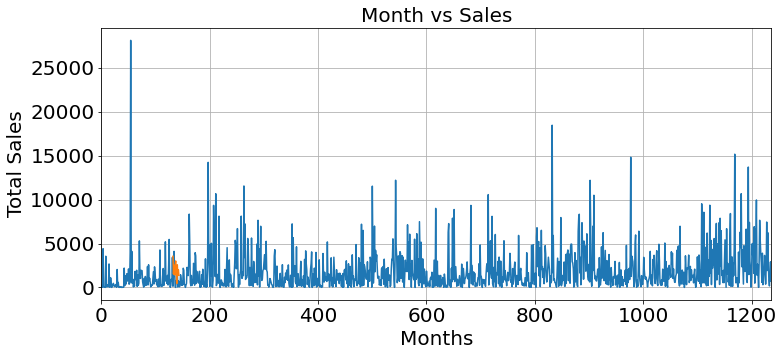

In [31]:
plt.figure(figsize=(12,5))
plt.title('Month vs Sales',fontsize = 20)
plt.ylabel('Total Sales',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(sales_data['Sales'])
plt.plot(x,actual_predictions)

In [33]:
sales_data['Sales'][:-train_window]
train_df = pd.DataFrame(sales_data['Sales'][:-train_window])
actual_df = pd.DataFrame(actual_predictions)
actual_df.columns = ['Sales']
new_predict = pd.concat([train_df, actual_df]).reset_index(drop=True)

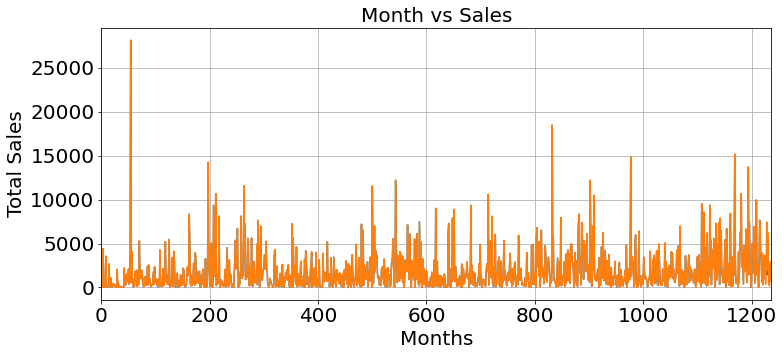

In [34]:
plt.figure(figsize=(12,5))
plt.title('Month vs Sales',fontsize = 20)
plt.ylabel('Total Sales',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(new_predict)
plt.plot(sales_data['Sales'])

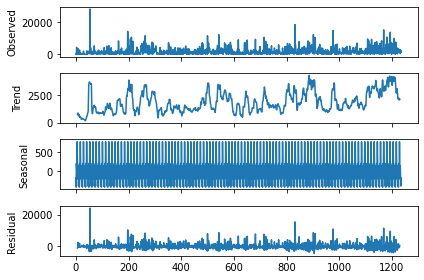

In [37]:
decomposition = seasonal_decompose(new_predict, freq=12) 
decomposition.plot()
plt.show()

In [83]:
from statsmodels.tsa.stattools import acf

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mse = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    
    return({'mape':mape, 'me':me, 'mse': mse, 
            'mpe': mpe, 'rmse':rmse})
    
forecast_accuracy(train_df, actual_df)

{'mape': Sales    0.986057
 dtype: float64, 'me': Sales   -1252.830727
 dtype: float64, 'mpe': Sales   -0.574092
 dtype: float64, 'mse': Sales    1913.077756
 dtype: float64, 'rmse': Sales    2121.06336
 dtype: float64}